In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# 多項式の次数
M = 3

# 基底関数
def phi(x):
  return np.array([x**k for k in reversed(range(M+1))]).reshape((M+1, -1))

w_true=[-1.2,1.6,-0.3,0.1]
def f(x,w):
  return np.poly1d(w)(x) 

def g(x):
  return np.sin(2*np.pi*x)

# 訓練データ数
N = 30


x=np.linspace(-10,10,100)
y=f(x,w_true)

# 訓練データx
data_x=(np.random.rand(N)-0.5)*2.0
# 訓練データt
data_t = f(data_x,w_true) + np.random.normal(0, 0.2, N)
# 列ベクトル
data_x = data_x.reshape(N, 1)
data_t = data_t.reshape(N, 1)
# 行列Phiを作成
Phi=phi(data_x).T



## ベイズ線形回帰
"""
# 事前分布の分散
alpha = 1/1000
# 想定する誤差の分散
beta= 1/0.2
# SN
SN = np.linalg.inv(alpha * np.eye(M+1) + beta*np.dot(Phi.T, Phi))
# mN
mN = beta*np.dot(SN, np.dot(Phi.T, data_t))
"""
import sklearn.linear_model
clf=sklearn.linear_model.BayesianRidge()
clf.fit(Phi,data_t)
mN=clf.coef_
SN=clf.sigma_
alpha=clf.alpha_ 
beta=clf.lambda_ 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


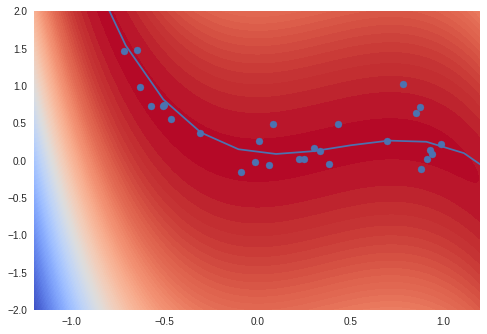

In [0]:
# 予測分布の値を返す
def prediction_dist(x, y):
  var = alpha + np.dot(phi(x).T, np.dot(SN, phi(x)))
  mu = np.dot(phi(x).T, mN)
  return (1/np.sqrt(2*np.pi*var))*np.exp(-((y-mu)**2)/(2*var))
# 高速化のため
prediction_dist_function = np.vectorize(prediction_dist)

# 予測分布のヒートマップを求める
x_p, y_p = np.meshgrid(np.linspace(-1.2, 1.2, 100), np.linspace(-2.0, 2.0, 100))
z = prediction_dist_function(x_p, y_p)

## 予測分布の表示
plt.xlim(-1.2, 1.2)
plt.ylim(-2.0, 2.0)
plt.contourf(x_p, y_p, z,100, cmap=cm.coolwarm)
plt.scatter(data_x, data_t)
plt.plot(x,y)

plt.show()

In [0]:
e=beta/2*np.linalg.norm(data_t-np.dot(Phi, mN), ord=2)+alpha/2*np.linalg.norm(mN)

log_evidence=M/2*np.log(alpha) + N/2*np.log(beta) - e - 1/2*np.log(np.linalg.det(SN)) - N/2*np.log(2*np.pi)

print(log_evidence)

-51.55481386581911


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

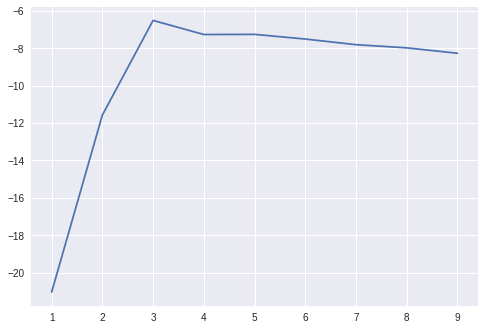

In [0]:
# 基底関数
def phi_M(x,M):
    return np.array([x**k for k in reversed(range(M+1))]).reshape((M+1, -1))
log_evidence_list=[]
for M in range(1,10):

  Phi_M=phi_M(data_x,M).T
  """
  ## ベイズ線形回帰
  # 事前分布の分散
  alpha = 1/1000
  # 想定する誤差の分散
  beta= 1/0.2
  # SN
  SN = np.linalg.inv(alpha * np.eye(M+1) + beta*np.dot(Phi_M.T, Phi_M))
  # mN
  mN = beta*np.dot(SN, np.dot(Phi_M.T, data_t))
  """
  import sklearn.linear_model
  clf=sklearn.linear_model.BayesianRidge(n_iter=10000,tol=1.0e-6,fit_intercept=False)
  clf.fit(Phi_M,data_t)
  mN=clf.coef_
  SN=clf.sigma_
  beta=clf.alpha_ 
  alpha=clf.lambda_ 

  e=beta/2*np.linalg.norm(data_t.reshape(N)-np.dot(Phi_M, mN).reshape(N), ord=2)+alpha/2*np.linalg.norm(mN, ord=2)
  A=alpha * np.eye(M+1) + beta*np.dot(Phi_M.T, Phi_M)
  log_evidence=M/2*np.log(alpha)+N/2*np.log(beta)-e-1/2*np.log(np.linalg.det(A))-N/2*np.log(2*np.pi)
  log_evidence_list.append(log_evidence)
plt.plot(list(range(1,10)),log_evidence_list)
